# 1. Identificación del caso de problema

* El caso corresponde a un tipo de aprendizaje supervisado de variables categóricas. Además, se trata de un problema de clasificación binaria en donde la variable dependiente puede tomar solamente dos valores (sí o no).

# 2. Identificación de las variables y sus características.

### Dataset: Cliente
----

Cada fila representa un cliente, cada columna contiene atributos de este. 

La columna *Churn* indica si el cliente dejo de utilizar el servicio o no.

clientes | atributos
:----:   | :----:
7043     | 21


### Variables

Nombre   | Descripción  | Posibles valores
:------- | :-----       | :---:
customerID | Identificación del cliente |
gender | Género del cliente |
SeniorCitizen | Es un adulto mayor | (1,0)
Partner | Tiene un socio | (Yes, No)
Dependents | Tiene dependientes o no | (Yes, No)
Tenure | Número de meses que el cliente permaneció en la empresa |
PhoneService | Servicio de telefonía asociado | (Yes, No)
MultipleLines | Si tiene múltiple líneas de telefonía | (Yes, No, No phone service)
InternetService | Tipo de servicio de internet | (DSL, Fiber optic, No)
OnlineSecurity | El cliente solicitó servicio de seguridad online | (Yes, No, No internet service)
OnlineBackup | Servicio de backup online brindado | (Yes, No, No internet service)
DeviceProtection | Servicio de protección de dispositivos móviles | (Yes, No, No internet service)
TechSupport | Servicio de soporte extendido | (Yes, No, No internet service)
StreamingTV | Servicio de streaming TV | (Yes, No, No internet service)
StreamingMovies | Servicio de streaming de películas | (Yes, No, No internet service)
Contract | Tipo de contrato, plazo | (Month-to-month, One year, Two year)
PaperlessBilling | Factura online | (Yes, No)
PaymentMethod | Método de pago | (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges | Valor facturado mensualmente |
TotalCharges | Total facturado al cliente |
Churn | El cliente se dio de baja del servicio | (Yes, No)

# 3. Realizamos la tarea de preprocesamiento en caso de ser necesario. Limpieza de variables, normalización, categorización, remuestreo, binarización, etc.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

In [3]:
clients = pd.read_csv("Cliente.csv")

In [4]:
clients.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Verificar que los ID sean únicos

In [5]:
len(clients)

7043

In [6]:
clients.customerID.nunique()

7043

In [48]:
clients.gender.nunique(), clients.gender.unique()

(2, array(['Female', 'Male'], dtype=object))

#### Verificar que "Partner" es una columna binaria según lo indicado

In [49]:
clients.Partner.nunique(), clients.Partner.unique()

(2, array(['Yes', 'No'], dtype=object))

#### Verificar que "SeniorCitizen" es binario

In [50]:
clients.SeniorCitizen.nunique(), clients.SeniorCitizen.unique()

(2, array([0, 1], dtype=int64))

#### Verificar que "Dependents" es binario

In [51]:
clients.Dependents.nunique(), clients.Dependents.unique()

(2, array(['No', 'Yes'], dtype=object))

#### Verificar que "PhoneService" es binario

In [52]:
clients.PhoneService.nunique(), clients.PhoneService.unique()

(2, array(['No', 'Yes'], dtype=object))

#### Verificar que "MultipleLines" tiene 3 posibles valores

In [53]:
clients.MultipleLines.nunique(), clients.MultipleLines.unique()

(3, array(['No phone service', 'No', 'Yes'], dtype=object))

#### Verificar que "InternetService" tiene 3 posibles valores

In [54]:
clients.InternetService.nunique(), clients.InternetService.unique()

(3, array(['DSL', 'Fiber optic', 'No'], dtype=object))

#### Verificar que "OnlineSecurity" tiene 3 posibles valores

In [55]:
clients.OnlineSecurity.nunique(), clients.OnlineSecurity.unique()

(3, array(['No', 'Yes', 'No internet service'], dtype=object))

#### Verificar que "OnlineBackup" tiene 3 posibles valores

In [56]:
clients.OnlineBackup.nunique(), clients.OnlineBackup.unique()

(3, array(['Yes', 'No', 'No internet service'], dtype=object))

#### Verificar que "DeviceProtection" tiene 3 posibles valores

In [57]:
clients.DeviceProtection.nunique(), clients.DeviceProtection.unique()

(3, array(['No', 'Yes', 'No internet service'], dtype=object))

#### Verificar que "TechSupport" tiene 3 posibles valores

In [58]:
clients.TechSupport.nunique(), clients.TechSupport.unique()

(3, array(['No', 'Yes', 'No internet service'], dtype=object))

#### Verificar que "StreamingTV" tiene 3 posibles valores

In [59]:
clients.StreamingTV.nunique(), clients.StreamingTV.unique()

(3, array(['No', 'Yes', 'No internet service'], dtype=object))

#### Verificar que "StreamingMovies" tiene 3 posibles valores

In [60]:
clients.StreamingMovies.nunique(), clients.StreamingMovies.unique()

(3, array(['No', 'Yes', 'No internet service'], dtype=object))

#### Verificar que "Contract" tiene 3 posibles valores

In [61]:
clients.Contract.nunique(), clients.Contract.unique()

(3, array(['Month-to-month', 'One year', 'Two year'], dtype=object))

#### Verificar que "PaperlessBilling" tiene 2 posibles valores

In [62]:
clients.PaperlessBilling.nunique(), clients.PaperlessBilling.unique()

(2, array(['Yes', 'No'], dtype=object))

#### Verificar que "PaymentMethod" tiene 3 posibles valores

In [63]:
clients.PaymentMethod.nunique(), clients.PaymentMethod.unique()

(4,
 array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
        'Credit card (automatic)'], dtype=object))

#### Verificar que "Churn" tiene 3 posibles valores

In [64]:
clients.Churn.nunique(), clients.Churn.unique()

(2, array(['No', 'Yes'], dtype=object))

### Validar que no haya campos vacíos

In [65]:
clients.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No hay campos vacíos

### Búsqueda de datos inconsistentes

* Hay dos casos en donde existen columnas dependientes de otras: el caso de **PhoneService** e **InternetService**.
* En estos dos casos, cuando la etiqueta es "No", las columnas subsiguientes deben tener la etiqueta **"No phone service"** o **"No internet service"** respectivamente para que sean consistentes.

#### Búsqueda de datos inconsistentes en PhoneService

In [7]:
inconsistent_data_phone = clients[(clients['PhoneService'] == 'No') & (clients['MultipleLines'] != 'No phone service')]

if not inconsistent_data_phone.empty:
    print("Datos inconsistentes encontrados respecto al servicio telefónico:")
    print(inconsistent_data_phone.customerID, inconsistent_data.PhoneService, inconsistent_data.MultipleLines)
    inconsistent_data_phone
else:
    print("No hay datos inconsistentes respecto al servicio telefónico.")

No hay datos inconsistentes respecto al servicio telefónico.


In [8]:
inconsistent_data_phone_yes = clients[(clients['PhoneService'] == 'Yes') & (clients['MultipleLines'] == 'No phone service')]

if not inconsistent_data_phone_yes.empty:
    print("Datos inconsistentes encontrados respecto al servicio telefónico:")
    print(inconsistent_data_phone_yes.customerID, inconsistent_data.PhoneService, inconsistent_data.MultipleLines)
    inconsistent_data_phone_yes
else:
    print("No hay datos inconsistentes respecto al servicio telefónico.")

No hay datos inconsistentes respecto al servicio telefónico.


#### Búsqueda de datos inconsistentes en InternetService

In [9]:
inconsistent_data_internet = clients[(clients['InternetService'] == 'No') & ((clients['OnlineSecurity'] != 'No internet service') | (clients['OnlineBackup'] != 'No internet service') | (clients['DeviceProtection'] != 'No internet service') | (clients['TechSupport'] != 'No internet service') | (clients['StreamingTV'] != 'No internet service') | (clients['StreamingMovies'] != 'No internet service'))]

if not inconsistent_data_internet.empty:
    print("Datos inconsistentes encontrados respecto del servicio a internet:")
    inconsistent_data
else:
    print("No hay datos inconsistentes respecto del servicio a internet.")

No hay datos inconsistentes respecto del servicio a internet.


In [10]:
inconsistent_data_internet_dsl = clients[(clients['InternetService'] == 'DSL') & ((clients['OnlineSecurity'] == 'No internet service') | (clients['OnlineBackup'] == 'No internet service') | (clients['DeviceProtection'] == 'No internet service') | (clients['TechSupport'] == 'No internet service') | (clients['StreamingTV'] == 'No internet service') | (clients['StreamingMovies'] == 'No internet service'))]

if not inconsistent_data_internet_dsl.empty:
    print("Datos inconsistentes encontrados respecto del servicio a internet:")
    inconsistent_data_internet_dsl
else:
    print("No hay datos inconsistentes respecto del servicio a internet.")

No hay datos inconsistentes respecto del servicio a internet.


In [11]:
inconsistent_data_internet_fiber = clients[(clients['InternetService'] == 'Fiber optic') & ((clients['OnlineSecurity'] == 'No internet service') | (clients['OnlineBackup'] == 'No internet service') | (clients['DeviceProtection'] == 'No internet service') | (clients['TechSupport'] == 'No internet service') | (clients['StreamingTV'] == 'No internet service') | (clients['StreamingMovies'] == 'No internet service'))]

if not inconsistent_data_internet_fiber.empty:
    print("Datos inconsistentes encontrados respecto del servicio a internet:")
    inconsistent_data_internet_fiber
else:
    print("No hay datos inconsistentes respecto del servicio a internet.")

No hay datos inconsistentes respecto del servicio a internet.


### Validar tipos de datos

In [71]:
clients.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* Hay que convertir las columnas categóricas en numéricas para poder aplicar modelos.

## Feature Engineering

* Se listarán las categorías para convertirlas en números para facilitar el procesamiento de los datos.

#### Conversión a float de la columna "TotalCharges" y fill de celdas vacías

In [12]:
custom_clients = clients

In [13]:
custom_clients[custom_clients['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
custom_clients['TotalCharges'] = pd.to_numeric(custom_clients['TotalCharges'], errors='coerce')
custom_clients.TotalCharges.fillna(0, inplace=True)

In [16]:
custom_clients.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [76]:
custom_clients.to_csv("Clients-cleaned.csv")

### Preparación del dataset de entrenamiento y test

In [17]:
categorial_features_X = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]
categorical_features_y = ["Churn"]

In [18]:
X = clients.drop("customerID", axis=1)
X = X.drop("Churn", axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [19]:
y = custom_clients.Churn
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [20]:
one_hot = OneHotEncoder()
transformer_X = ColumnTransformer([("one hot", one_hot, categorial_features_X)], remainder="passthrough")
transformed_X = transformer_X.fit_transform(X)

In [81]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.85,29.85
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,56.95,1889.50
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,53.85,108.15
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,45.0,42.30,1840.75
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,24.0,84.80,1990.50
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,72.0,103.20,7362.90
7040,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11.0,29.60,346.45
7041,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,74.40,306.60


In [21]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

## 4. Entrenamiento de modelos

#### Regresión logistica

##### Ventajas

- La regresión logística es más fácil de implementar, interpretar y muy eficiente de entrenar.
- Es muy rápido en la clasificación de registros desconocidos.
- Buena precisión para muchos conjuntos de datos simples y funciona bien cuando el conjunto de datos es linealmente separable.
- La regresión logística es computacionalmente eficiente y es adecuada para conjuntos de datos grandes.


##### Limitaciones

- Si el número de observaciones es menor que el número de características, no se debe utilizar la regresión logística, de lo contrario, puede provocar un sobreajuste.
- La principal limitación de la regresión logística es la suposición de linealidad entre la variable dependiente y las variables independientes.
- La regresión logística es adecuada solo para problemas de clasificación, no para problemas de regresión (predicción de valores numéricos).

In [22]:
## Regresión Logistica
clf = LogisticRegression(random_state=13, max_iter=1000).fit(X_train, y_train)
print("Accuracy Logistic Regression:", clf.score(X_test, y_test))

Accuracy Logistic Regression: 0.794180269694819


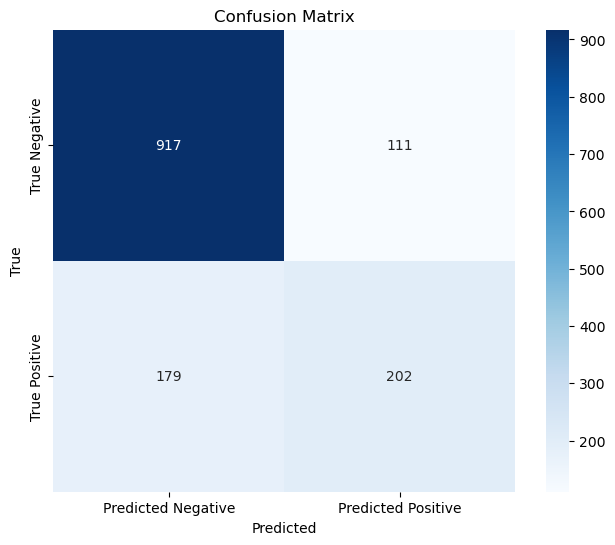

In [23]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### Maquina de vectores de soporte (SVM)

##### Ventajas

- Ser efectivos en espacios de alta dimensionalidad, aun cuando el número de dimensiones supera el número de muestras.
- Eficiente gestión de la memoria, al usar solo un subconjunto de puntos en la función de decisión.

##### Limitaciones

- Su eficacia depende del kernel que se utilice.
- Resultan poco eficientes con datasets grandes (el cálculo del kernel puede resultar muy lento).

In [60]:
## Maquina de vectores de soporte

lsvc = LinearSVC(verbose=0)
LinearSVC(random_state=13, penalty='l1', max_iter=1000, loss="hinge")
lsvc.fit(X_train, y_train)
print("Maquina de vectores de soporte", clf.score(X_test, y_test))

C:\Users\pazgo\Desktop\IA\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Maquina de vectores de soporte 0.6678495386799148


C:\Users\pazgo\Desktop\IA\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


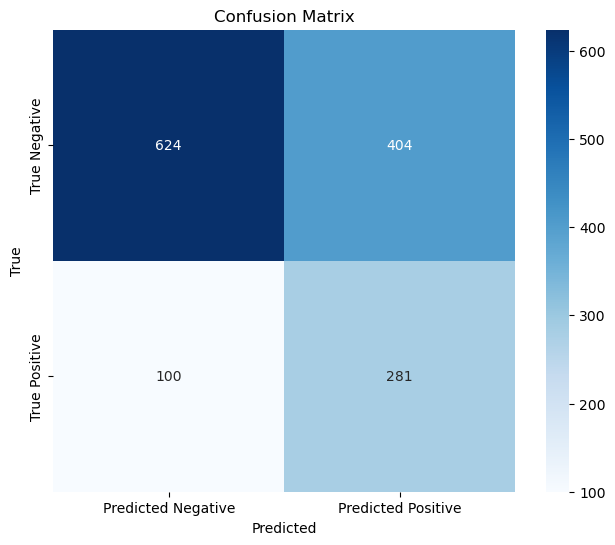

In [61]:
y_pred = lsvc.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### Gradient Boosting

#### Ventajas

- Alta precisión dado que combinan múltiples arboles de decisión para mejorar su capacidad productiva
- Velocidad de entrenamiento eficiente.

#### Limitaciones

- Requieren mayor cantidad de recursos computacionales.
- Configuración de hiperparametros.
- Estos modelos de pueden ser propensos al overfitting.

In [27]:
## Arboles de decision Gradient Boosting
gradient = GradientBoostingClassifier().fit(X_train, y_train)
print("Arboles de decision Gradient Boosting", gradient.score(X_test, y_test)) 

Arboles de decision Gradient Boosting 0.7977288857345636


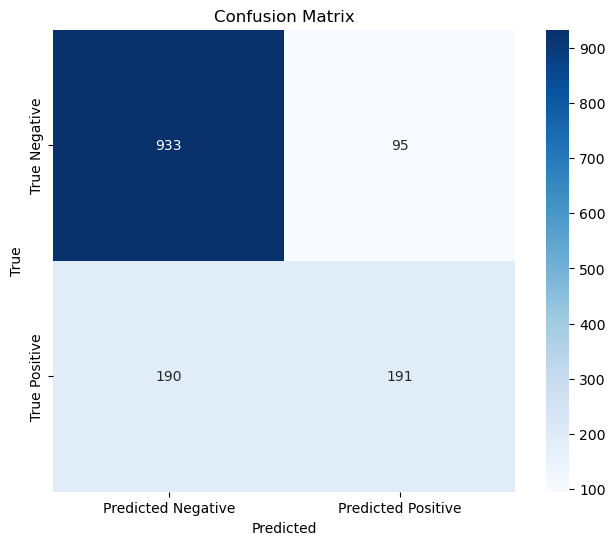

In [28]:
y_pred = gradient.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()